# 导入依赖

In [1]:
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings(action='once')

large = 22
medium = 16
small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': medium,
          'figure.figsize': (16, 10),
          'axes.labelsize': medium,
          'xtick.labelsize': medium,
          'ytick.labelsize': medium,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

print(mpl.__version__)
print(sns.__version__)

3.5.2
0.11.2


# 图1 散点图

散点图是用于研究两个变量之间关系的经典且基本的图。如果数据中有多个组，可以使用`plt.scatterplot()`，以不同的颜色可视化每个组。

说明：原代码运行警告`*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*. Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.`，解决方法是`np.array(color).reshape(1,-1)`


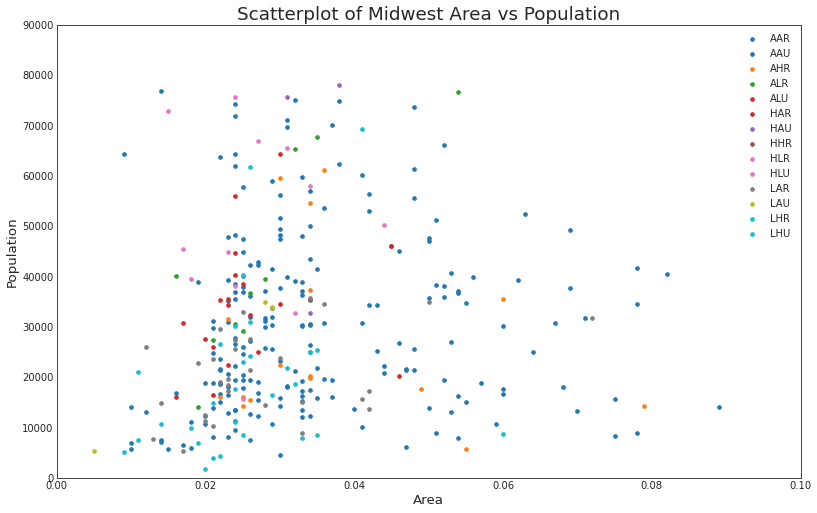

In [2]:
# Import dataset
# midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
midwest = pd.read_csv("../data/midwest_filter.csv")

# Prepare Data
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [np.array(plt.cm.tab10(i / float(len(categories) - 1))).reshape(1, -1) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi=60, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category == category, :], s=20, c=colors[i],
                label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000), xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)
plt.show()

# 图2 带边界的气泡图

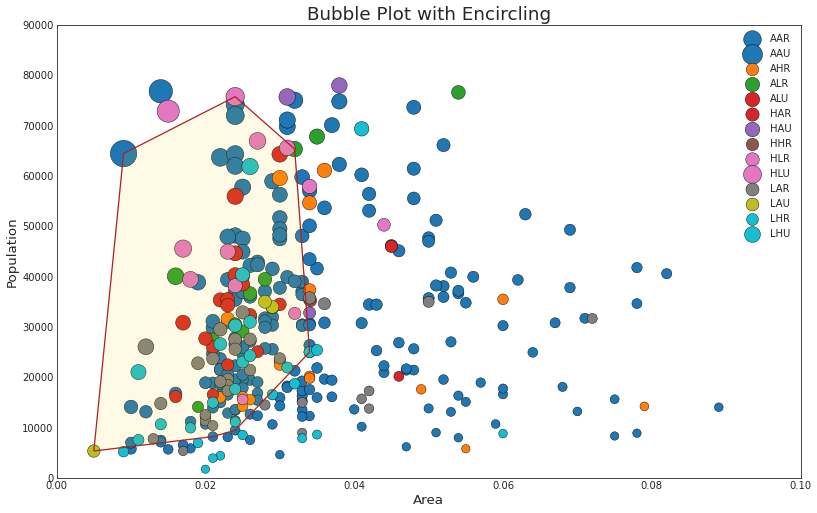

In [3]:
from scipy.spatial import ConvexHull

warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
# midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
midwest = pd.read_csv("../data/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [np.array(plt.cm.tab10(i / float(len(categories) - 1))).reshape(1, -1) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi=60, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category == category, :], s='dot_size', c=colors[i],
                label=str(category), edgecolors='black', linewidths=.5)


# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x, y, ax=None, **kw):
    if not ax: ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)


# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state == 'IN', :]

# Draw polygon surrounding vertices
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000), xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)
plt.show()

# 图3 具有线性回归最佳拟合线的散点图

想要禁用分组并仅为整个数据集绘制一条最佳拟合线，应该从`sns.lmplot()`中删除参数`hue='cyl'`

直接运行报错`ModuleNotFoundError: No module named 'statsmodels'`，需要`pip install statsmodels`

这张图没有上边界和右边界，Seaborn就是这么定义的

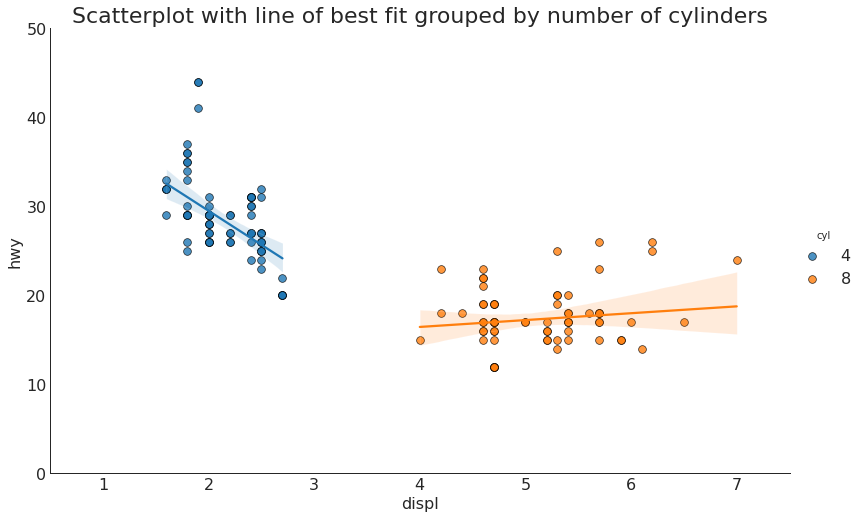

In [4]:
# Import Data
# df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df = pd.read_csv("../data/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4, 8]), :]

# Plot
sns.set_style("white")
grid_obj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, height=7, aspect=1.6, robust=True, palette='tab10',
                      scatter_kws=dict(s=60, linewidths=0.7, edgecolors='black'))

# Decorations
grid_obj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=22)
plt.show()

# 图4 抖动图

为避免多个点因坐标相同而互相遮盖，可以使用`seaborn.stripplot()`

原代码运行出现警告`FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.`，将`sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)`改为`sns.stripplot(x=df.cty, y=df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)`

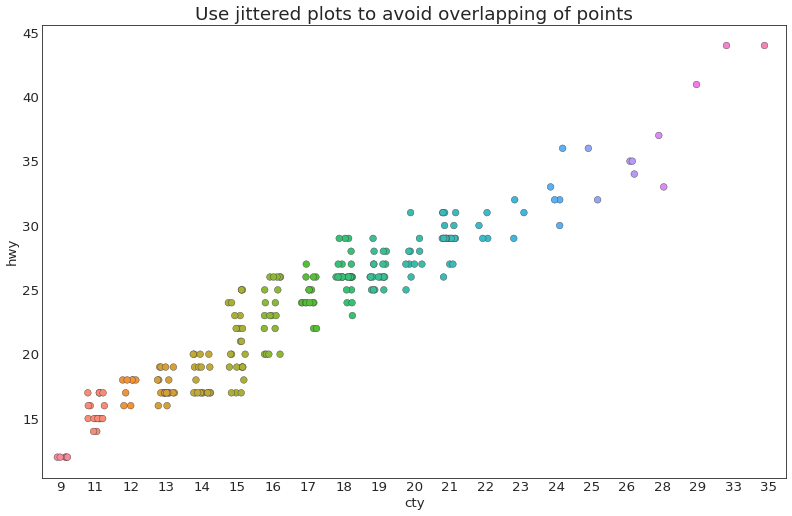

In [5]:
# Import Data
# df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df = pd.read_csv("../data/mpg_ggplot2.csv")

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16, 10), dpi=60)
sns.stripplot(x=df.cty, y=df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

# 图5 计数图

避免点重叠问题的另一个解决方法是根据该坐标中有多少点来增加点的大小，点的大小越大，周围的点就越集中

原代码运行报错`ValueError: s must be a scalar, or float array-like with the same size as x and y`，将`sns.stripplot(x=df_counts.cty, y=df_counts.hwy, size=df_counts.counts * 2, ax=ax)`改为`sns.stripplot(x=df_counts.cty, y=df_counts.hwy, sizes=df_counts.counts * 25, ax=ax)`

df_counts.count`*25`，是因为`*2`的话图的点太小

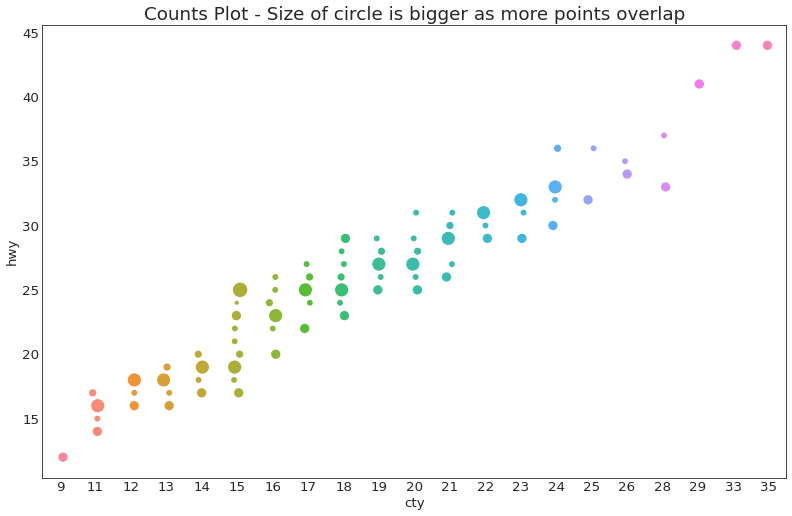

In [6]:
# Import Data
# df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df = pd.read_csv("../data/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16, 10), dpi=60)
sns.stripplot(x=df_counts.cty, y=df_counts.hwy, sizes=df_counts.counts * 25, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

# 图6 边缘直方图

边缘直方图具有沿x轴和y轴变量的直方图，可以用于可视化x和y之间的关系以及x和y的单变量分布，经常用于探索性数据分析(EDA)

原代码运行警告`UserWarning: FixedFormatter should only be used together with FixedLocator`，额外`import matplotlib.ticker as mticker`即可

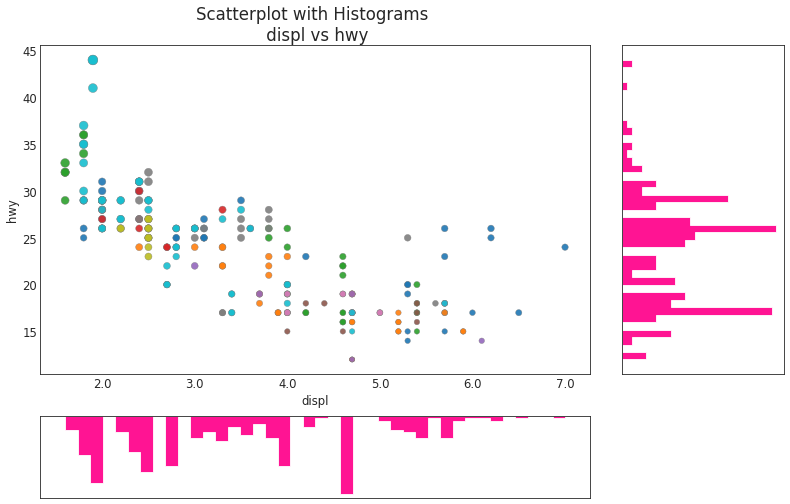

In [7]:
import matplotlib.ticker as mticker

# Import Data
# df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df = pd.read_csv("../data/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi=60)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, :-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty * 4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df,
                cmap="tab10", edgecolors='gray', linewidths=0.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

label_format = '{:,.1f}'
x_labels = ax_main.get_xticks().tolist()
ax_main.xaxis.set_major_locator(mticker.FixedLocator(x_labels))
ax_main.set_xticklabels([label_format.format(x) for x in x_labels])
plt.show()

# 图7 边缘箱线图

边际箱线图的用途与边际直方图相似，箱线图有助于确定x和y的中位数、第25和第75个百分位数

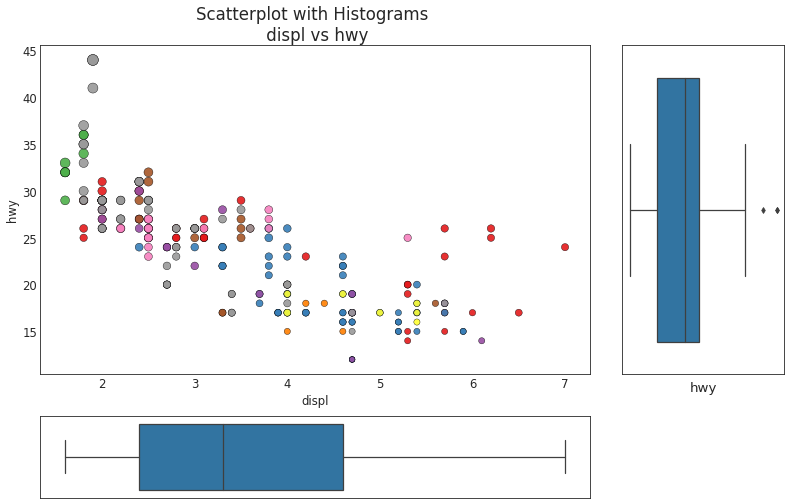

In [8]:
# Import Data
# df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df = pd.read_csv("../data/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi=60)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, :-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty * 5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df,
                cmap="Set1", edgecolors='black', linewidths=0.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

# 图8 相关图

相关图用于直观地查看给定数据帧(或二维数组)中所有可能的数值变量对之间的相关度量

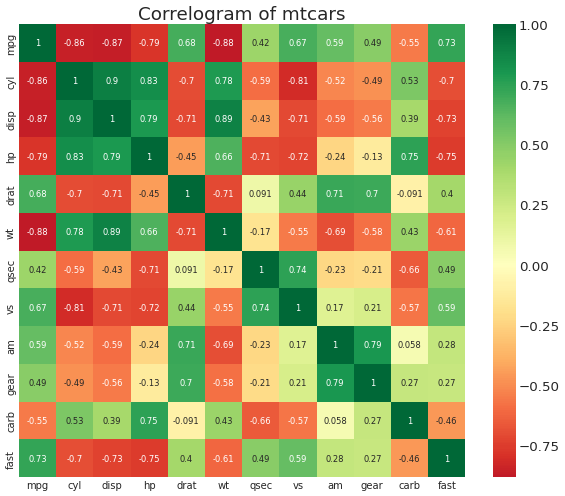

In [9]:
# Import Dataset
# df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df = pd.read_csv("../data/mtcars.csv")

# Plot
plt.figure(figsize=(12, 10), dpi=60)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0,
            annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 图9 矩阵图

矩阵图可用于探索性分析，用于理解所有可能的数值变量对之间的关系，是双变量分析的必备工具

<Figure size 600x480 with 0 Axes>

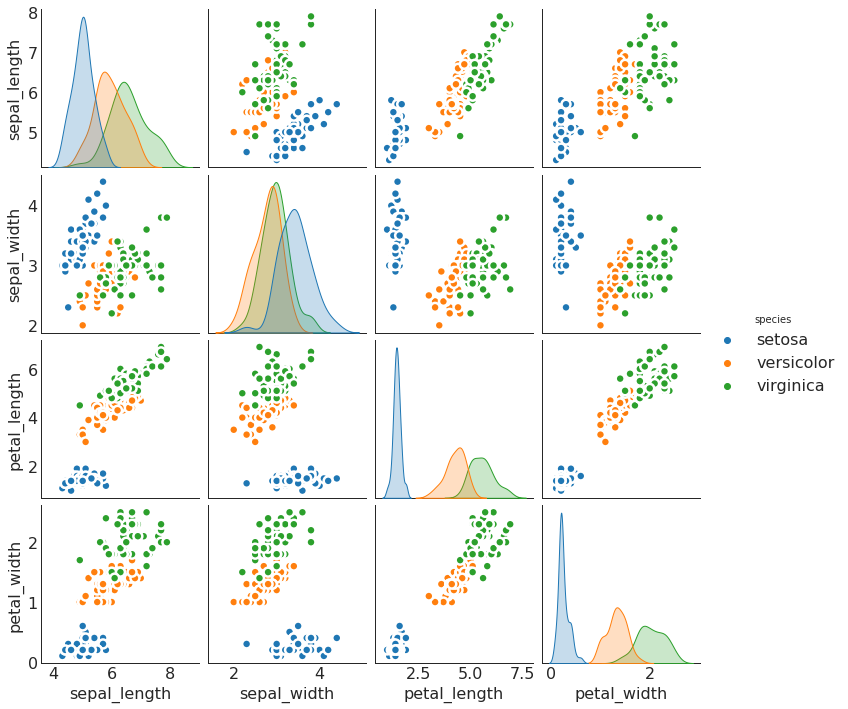

In [11]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10, 8), dpi=60)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 600x480 with 0 Axes>

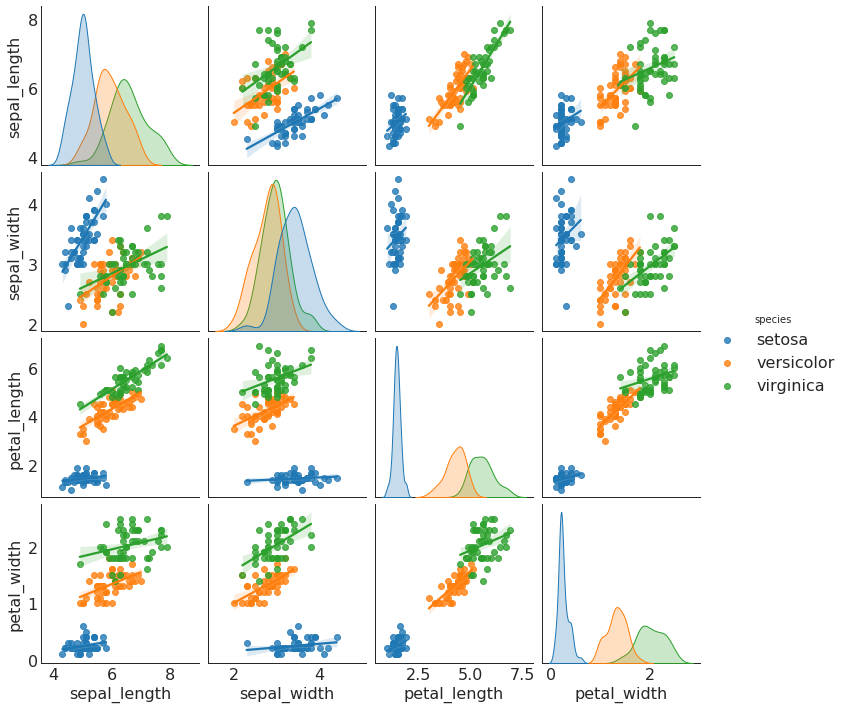

In [12]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10, 8), dpi=60)
sns.pairplot(df, kind="reg", hue="species")
plt.show()

# 图10 发散型条形图

发散型条形图有助于根据单个指标变化并可视化此差异的顺序和数量，有助于快速区分数据中组的性能，并且非常直观并且可以立即传达要点

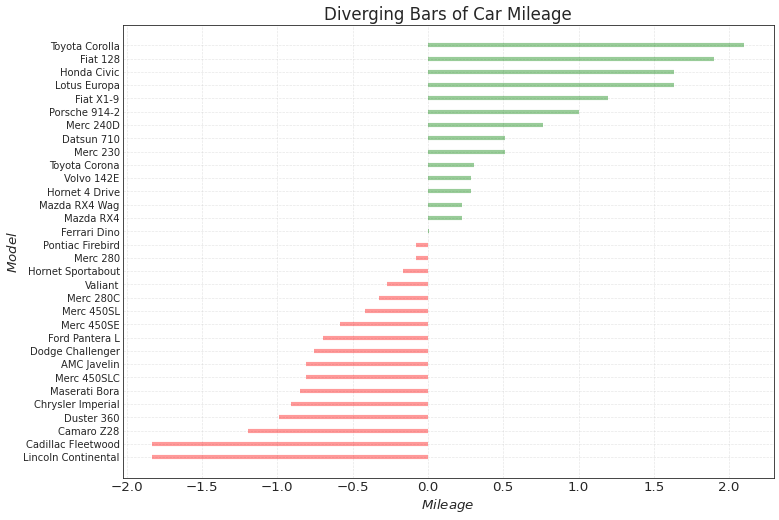

In [13]:
# Prepare Data
# df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df = pd.read_csv("../data/mtcars.csv")

x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14, 10), dpi=60)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size': 20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# 图11 发散型文本

发散的文本类似于发散的条形图，以一种漂亮且美观的方式显示图表中每个项目的值

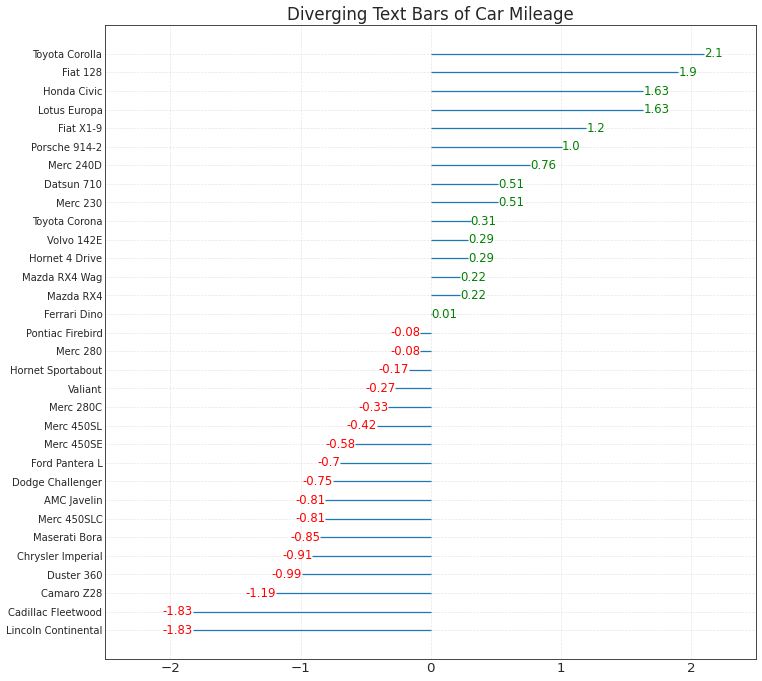

In [14]:
# Prepare Data
# df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df = pd.read_csv("../data/mtcars.csv")

x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14, 14), dpi=60)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left',
                 verticalalignment='center', fontdict={'color': 'red' if x < 0 else 'green', 'size': 14})

# Decorations
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size': 20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

# 图12 发散型包点图

发散型包点图也类似于发散型条形图，只是条的缺失减少了组之间的对比度和差异

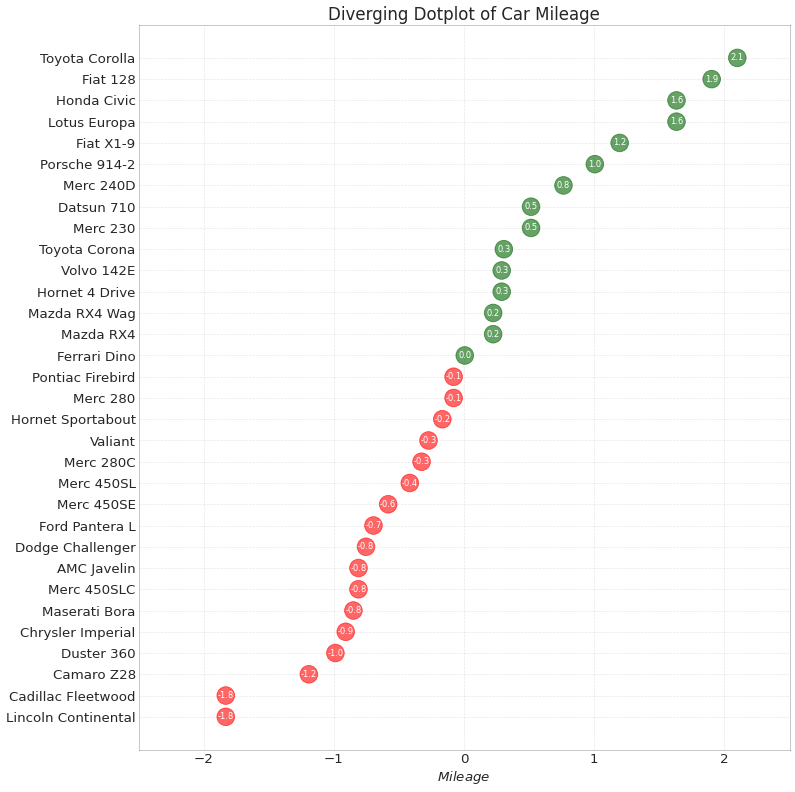

In [15]:
# Prepare Data
# df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df = pd.read_csv("../data/mtcars.csv")

x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14, 16), dpi=60)
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center',
                 verticalalignment='center', fontdict={'color': 'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.cars)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size': 20})
plt.xlabel('$Mileage$')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

# 图13 带标记的发散型棒棒糖图

带标记的棒棒糖图通过强调想要强调的任何重要数据点并在图表中适当地给出推理，提供了一种对差异进行可视化的灵活方式

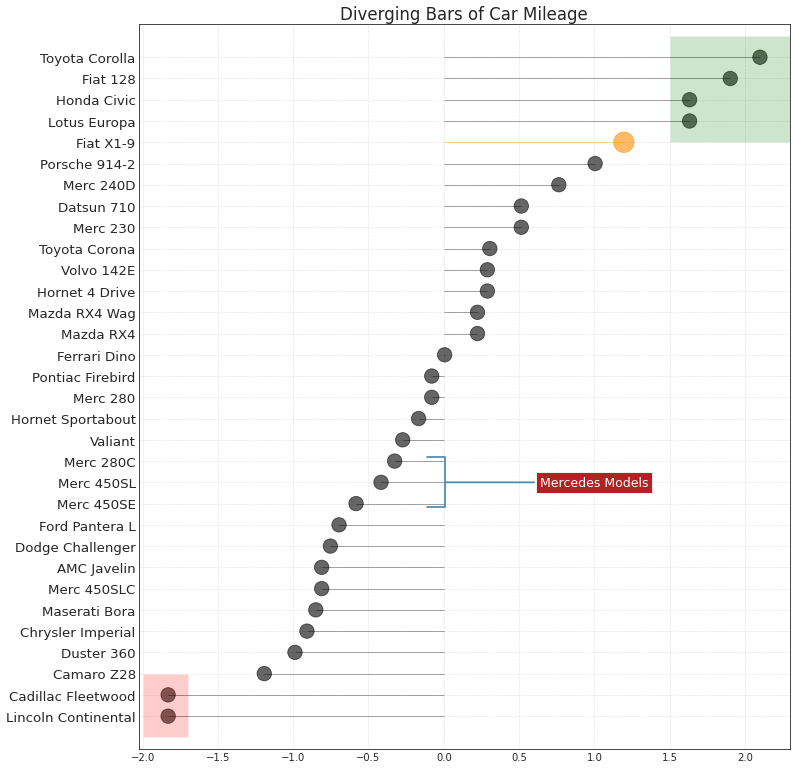

In [16]:
import matplotlib.patches as patches

# Prepare Data
# df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df = pd.read_csv("../data/mtcars.csv")

x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14, 16), dpi=60)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data',
             fontsize=15, ha='center', va='center', bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size': 20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# 图14 面积图

通过对轴和线之间的区域进行着色，面积图不仅更加强调了波峰和波谷，还强调了高点和低点的持续时间

面积图高点持续的时间越长，线下包围成的区域就越大

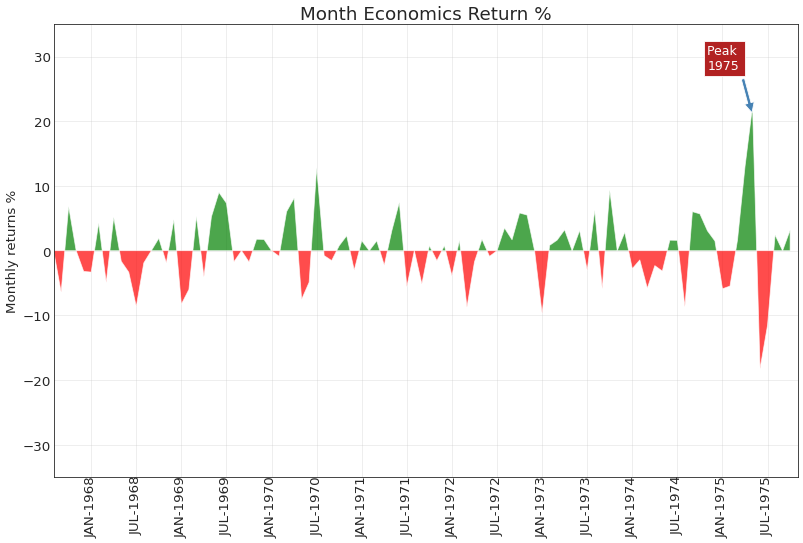

In [17]:
# Prepare Data
# df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)
df = pd.read_csv("../data/economics.csv", parse_dates=['date']).head(100)

x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0) / df.psavert.shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(16, 10), dpi=60)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')

# Decorations
xtickvals = [str(m)[:3].upper() + "-" + str(y) for y, m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90,
                          fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35, 35)
plt.xlim(1, 100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()

# 图15 有序条形图

有序条形图有效地传达了项目的排名顺序

在有序条形图上方添加度量标准的值，用户可以从图表本身获取精确信息

这是基于计数或任何给定指标可视化项目的经典方法

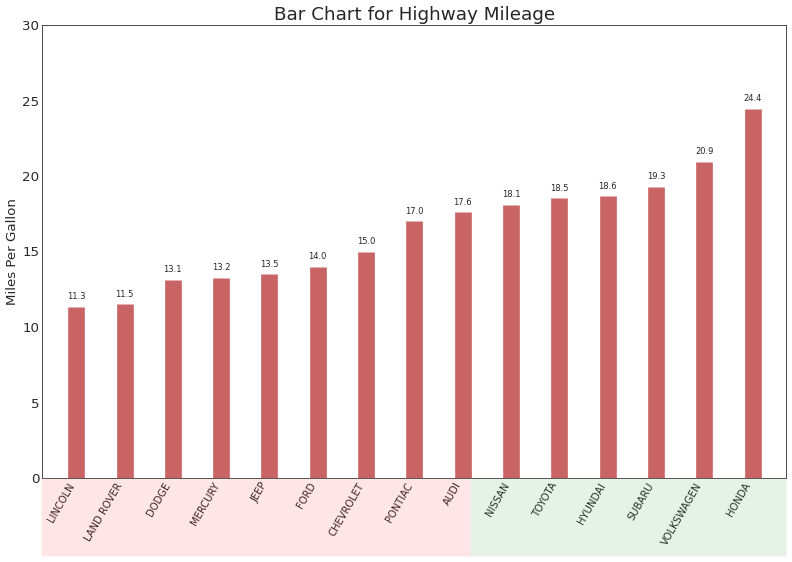

In [19]:
import matplotlib.patches as patches

# Prepare Data
# df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw = pd.read_csv("../data/mpg_ggplot2.csv")

df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16, 10), facecolor='white', dpi=60)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty + 0.5, round(cty, 1), horizontalalignment='center')

# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size': 22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=0.33, height=0.13, alpha=0.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=0.446, height=0.13, alpha=0.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

# 图16 棒棒糖图

棒棒糖图表以视觉上令人愉悦的方式达到与有序条形图类似的效果

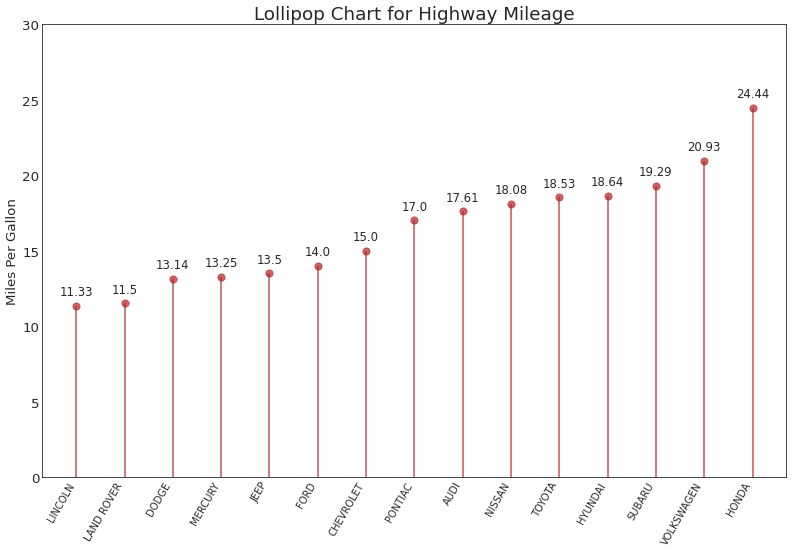

In [20]:
# Prepare Data
# df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw = pd.read_csv("../data/mpg_ggplot2.csv")

df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16, 10), dpi=60)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size': 22})
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size': 12})
ax.set_ylim(0, 30)

# Annotate
for row in df.itertuples():
    ax.text(row.Index, row.cty + .5, s=round(row.cty, 2), horizontalalignment='center', verticalalignment='bottom',
            fontsize=14)

plt.show()

# 图17 包点图

包点图传达了项目的排名顺序

由于包点图沿水平轴对齐，可以更轻松地看到这些点之间的距离

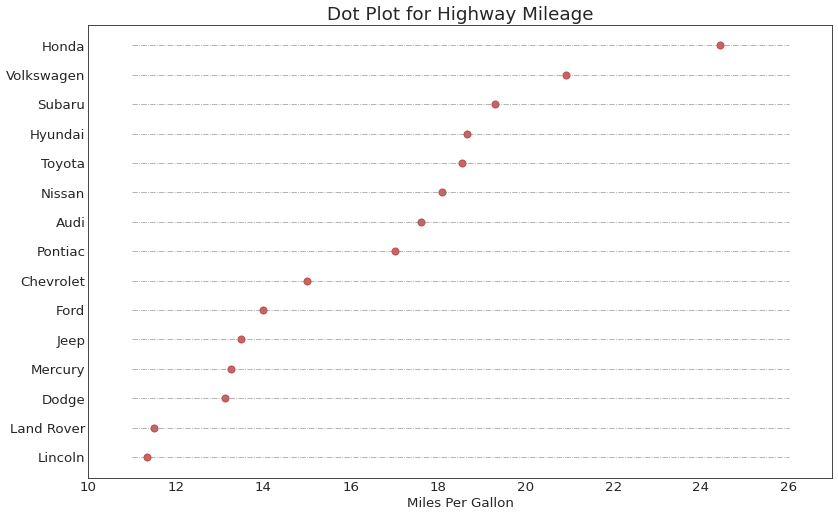

In [21]:
# Prepare Data
# df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw = pd.read_csv("../data/mpg_ggplot2.csv")

df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16, 10), dpi=60)
ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size': 22})
ax.set_xlabel('Miles Per Gallon')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()

# 图18 坡度图

坡度图最适合做给定人员/项目的前后对比

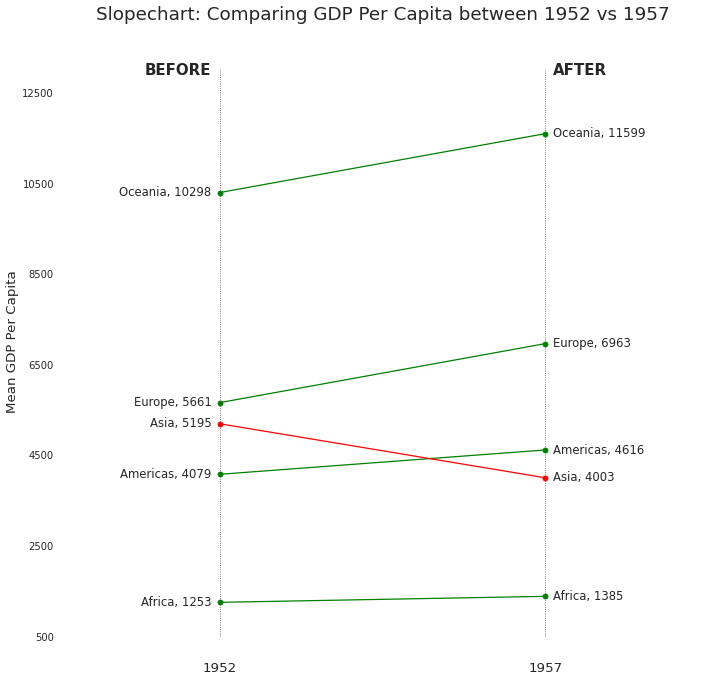

In [22]:
import matplotlib.lines as mlines

# Import Data
# df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")
df = pd.read_csv("../data/gdppercap.csv")

left_label = [str(c) + ', ' + str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', ' + str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1 - y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]


# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]], color='red' if p1[1] - p2[1] > 0 else 'green', marker='o',
                      markersize=6)
    ax.add_line(l)
    return l


fig, ax = plt.subplots(1, 1, figsize=(14, 14), dpi=60)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1, p1], [3, p2])
    ax.text(1 - 0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center',
            fontdict={'size': 14})
    ax.text(3 + 0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center',
            fontdict={'size': 14})

# 'Before' and 'After' Annotations
ax.text(1 - 0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center',
        fontdict={'size': 18, 'weight': 700})
ax.text(3 + 0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center',
        fontdict={'size': 18, 'weight': 700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size': 22})
ax.set(xlim=(0, 4), ylim=(0, 14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1, 3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.0)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.0)
plt.show()

# 图19 哑铃图

哑铃图传达了各种项目的前后对比以及项目的排名顺序

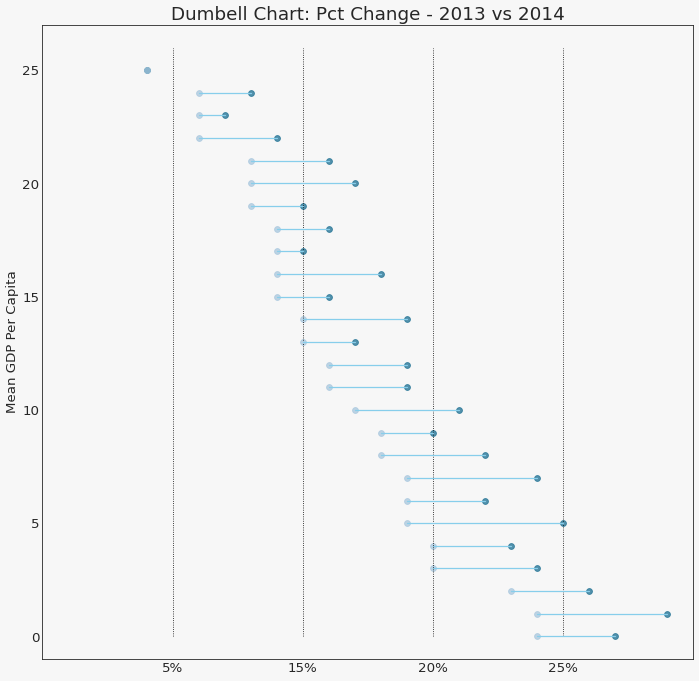

In [23]:
import matplotlib.lines as mlines

# Import Data
# df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")
df = pd.read_csv("../data/health.csv")

df.sort_values('pct_2014', inplace=True)
df.reset_index(inplace=True)


# Func to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]], color='skyblue')
    ax.add_line(l)
    return l


# Figure and Axes
fig, ax = plt.subplots(1, 1, figsize=(14, 14), facecolor='#f7f7f7', dpi=60)

# Vertical Lines
ax.vlines(x=.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['index'], x=df['pct_2013'], s=50, color='#0e668b', alpha=0.7)
ax.scatter(y=df['index'], x=df['pct_2014'], s=50, color='#a3c4dc', alpha=0.7)

# Line Segments
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014']):
    newline([p1, i], [p2, i])

# Decoration
ax.set_facecolor('#f7f7f7')
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014", fontdict={'size': 22})
ax.set(xlim=(0, .25), ylim=(-1, 27), ylabel='Mean GDP Per Capita')
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
plt.show()

# 图20 连续变量的直方图

直方图显示给定变量的频率分布

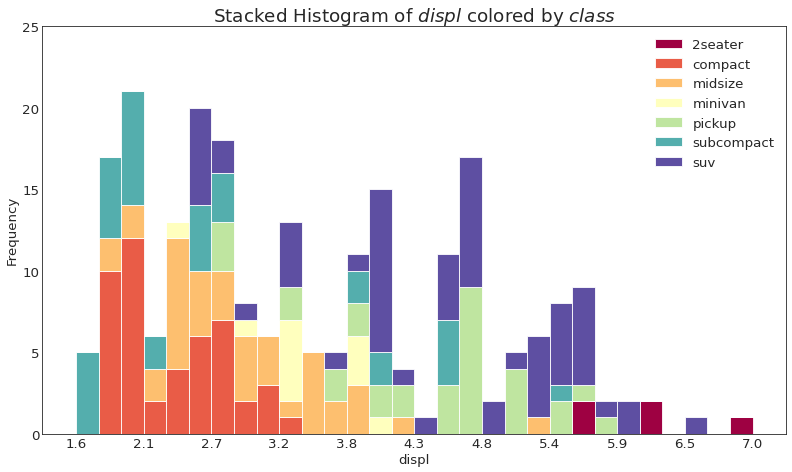

In [24]:
# Import Data
# df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = pd.read_csv("../data/mpg_ggplot2.csv")

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=60)
colors = [plt.cm.Spectral(i / float(len(vals) - 1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group: col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b, 1) for b in bins[::3]])
plt.show()

# 图21 分类变量的直方图

分类变量的直方图显示了该变量的频率分布

通过为条形着色，可以将分布与表示颜色的另一个分类变量一起可视化

原代码运行报错`The number of FixedLocator locations (16), usually from a call to set_ticks, does not match the number of ticklabels (15).`，因为`labels=np.unique(df[x_var]).tolist()`长度为15而`bins`长度为16，可以在`labels`后面`append('')`

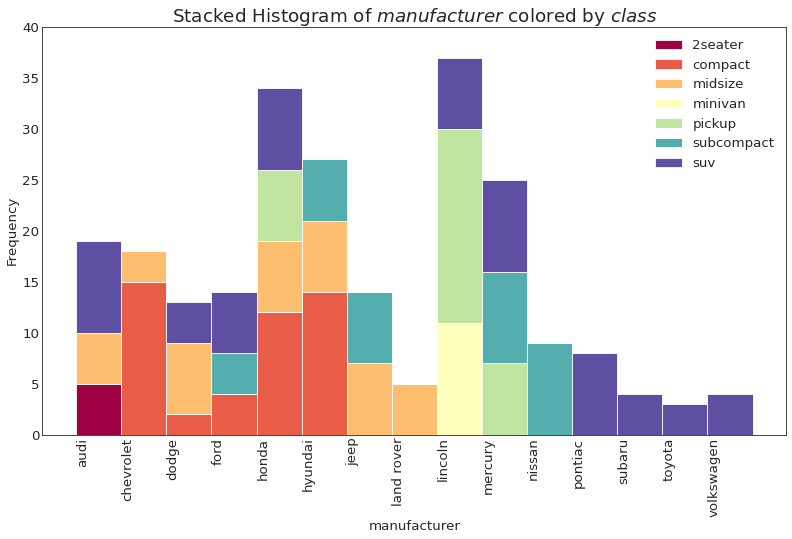

In [40]:
# Import Data
# df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = pd.read_csv("../data/mpg_ggplot2.csv")

# Prepare data
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=60)
colors = [plt.cm.Spectral(i / float(len(vals) - 1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group: col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
labels = np.unique(df[x_var]).tolist()
labels.append('')
plt.xticks(ticks=bins, labels=labels, rotation=90, horizontalalignment='left')
plt.show()

# 图22 密度图

密度图是可视化连续变量分布的常用工具

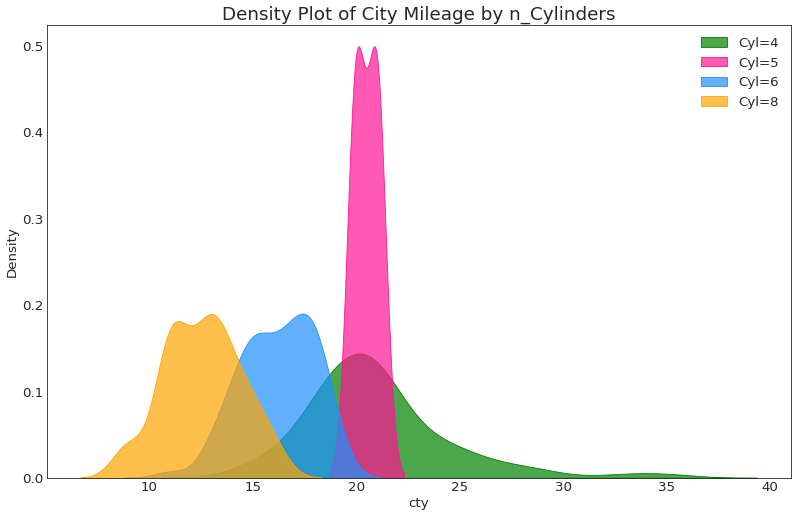

In [41]:
# Import Data
# df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = pd.read_csv("../data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16, 10), dpi=60)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=0.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=0.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=0.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=0.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

# 图23 直方密度曲线图

带有直方图的密度曲线将两个图传达的集体信息汇集在一起，因此可以将它们都放在一个图中而不是两个图中

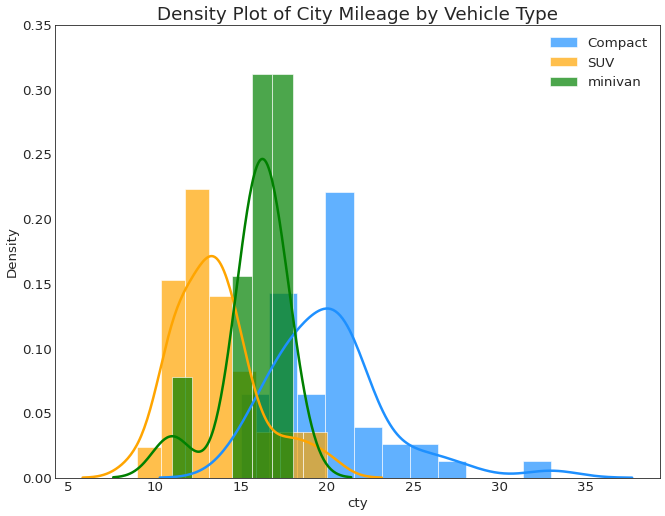

In [42]:
# Import Data
# df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = pd.read_csv("../data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13, 10), dpi=60)
sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha': 0.7},
             kde_kws={'linewidth': 3})
sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha': 0.7},
             kde_kws={'linewidth': 3})
sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha': 0.7},
             kde_kws={'linewidth': 3})
plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()
plt.show()

# 图24 重叠密度曲线图

JoyPlot允许不同组的密度曲线重叠，用于可视化大量组彼此之间分布

JoyPlot看起来令人赏心悦目并清楚地传达了正确的信息，可以使用joypy+matplotlib

需要先`pip install joypy`再`import joypy`

<Figure size 960x600 with 0 Axes>

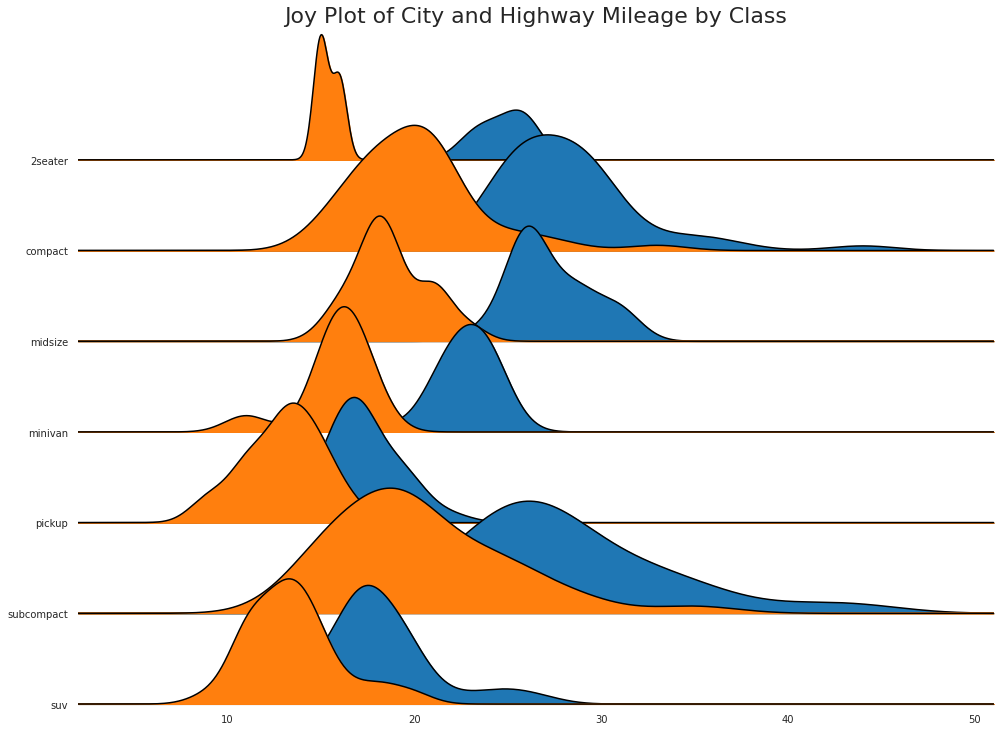

In [43]:
import joypy

# Import Data
# mpg = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
mpg = pd.read_csv("../data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16, 10), dpi=60)
fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14, 10))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()

# 图25 分布式包点图

分布式包点图显示了按组分割的点的单变量分布

点越暗，该区域中数据点的集中度越高

通过对中位数进行不同的着色，组的真实位置立即变得明显

原代码运行报错`ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()`，目前尚未解决问题

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

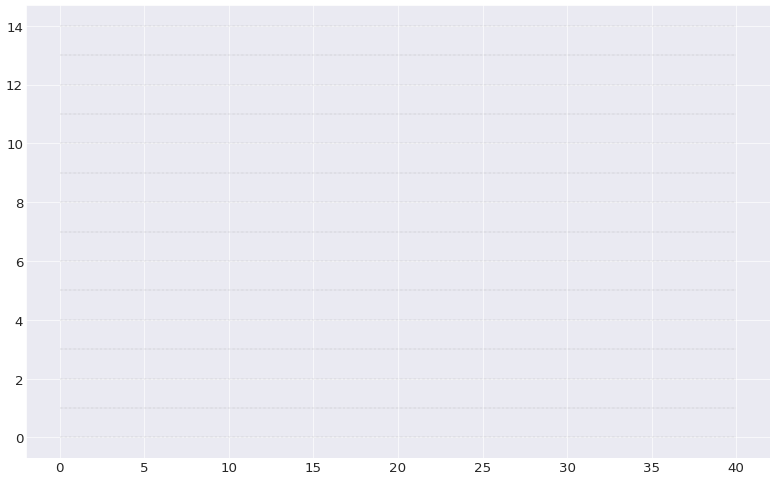

In [102]:
import matplotlib.patches as mpatches

# Prepare Data
# df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw = pd.read_csv("../data/mpg_ggplot2.csv")
cyl_colors = {4: 'tab:red', 5: 'tab:green', 6: 'tab:blue', 8: 'tab:orange'}
df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors)

# Mean and Median city mileage by make
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', ascending=False, inplace=True)
df.reset_index(inplace=True)
df_median = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.median())

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16, 10), dpi=60)
ax.hlines(y=df.index, xmin=0, xmax=40, color='gray', alpha=0.5, linewidth=0.5, linestyles='dashdot')

# Draw the Dots
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer == make, :]
    ax.scatter(y=np.repeat(i, df_make.shape[0]), x='cty', data=df_make, s=75, edgecolors='gray', c='w', alpha=0.5)
    ax.scatter(y=i, x='cty', data=df_median.loc[df_median.index == make, :], s=75, c='firebrick')

# Annotate
ax.text(33, 13, "$red \; dots \; are \; the \: median$", fontdict={'size': 12}, color='firebrick')

# Decorations
red_patch = plt.plot([], [], marker="o", ms=10, ls="", mec=None, color='firebrick', label="Median")
plt.legend(handles=red_patch)
ax.set_title('Distribution of City Mileage by Make', fontdict={'size': 22})
ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7)
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.set_xlim(1, 40)
plt.xticks(alpha=0.7)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.grid(axis='both', alpha=.4, linewidth=0.1)
plt.show()

# 图26 箱线图

箱形图是一种可视化分布的好方法，关注中位数、第25个第45个四分位数和异常值

箱线图需要注意解释可能会扭曲该组中包含的点数的框的大小，手动提供每个框中的观察数量可以帮助克服这个缺点

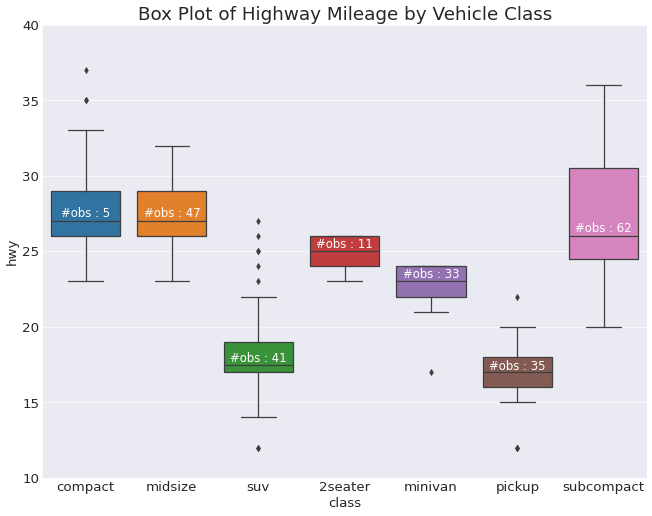

In [103]:
# Import Data
# df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = pd.read_csv("../data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13, 10), dpi=60)
sns.boxplot(x='class', y='hwy', data=df, notch=False)


# Add N Obs inside boxplot (optional)
def add_n_obs(df, group_col, y):
    medians_dict = {grp[0]: grp[1][y].median() for grp in df.groupby(group_col)}
    xtick_labels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xtick_label), n_ob in zip(enumerate(xtick_labels), n_obs):
        plt.text(x, medians_dict[xtick_label] * 1.01, "#obs : " + str(n_ob), horizontalalignment='center',
                 fontdict={'size': 14}, color='white')


add_n_obs(df, group_col='class', y='hwy')

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()

# 图27 包点+箱形图

包点+箱形图传达类似于分组的箱形图信息，此外，这些点可以了解每组中有多少数据点

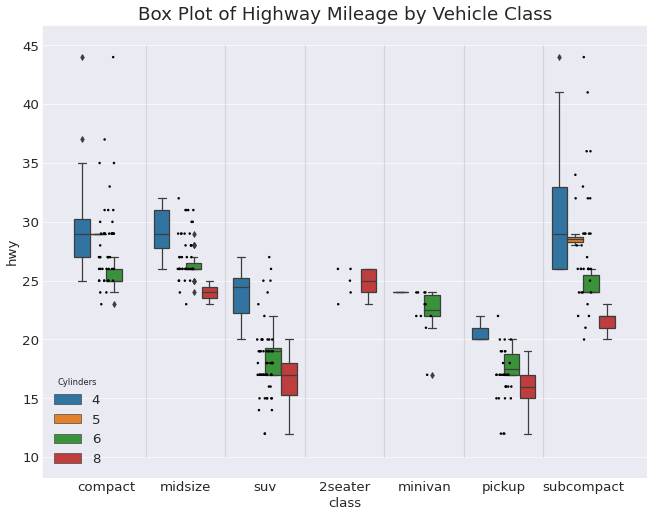

In [104]:
# Import Data
# df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = pd.read_csv("../data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13, 10), dpi=60)
sns.boxplot(x='class', y='hwy', data=df, hue='cyl')
sns.stripplot(x='class', y='hwy', data=df, color='black', size=3, jitter=1)

for i in range(len(df['class'].unique()) - 1):
    plt.vlines(i + .5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.legend(title='Cylinders')
plt.show()

# 图28 小提琴图

小提琴图比箱形图更好看，小提琴的形状或面积取决于它所持有的观察次数

小提琴图可能比箱线图更难以阅读，且不常用于专业的场合

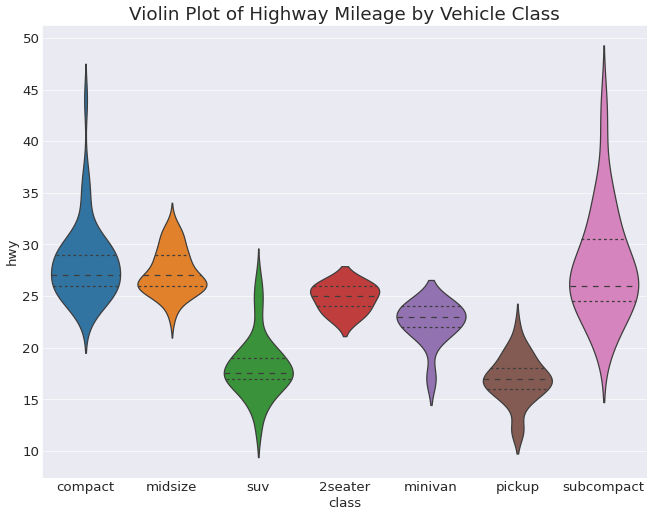

In [105]:
# Import Data
# df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = pd.read_csv("../data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13, 10), dpi=60)
sns.violinplot(x='class', y='hwy', data=df, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()

# 图29 人口金字塔

人口金字塔可用于显示按体积排序的组的分布，也可以用于显示人口的逐级过滤

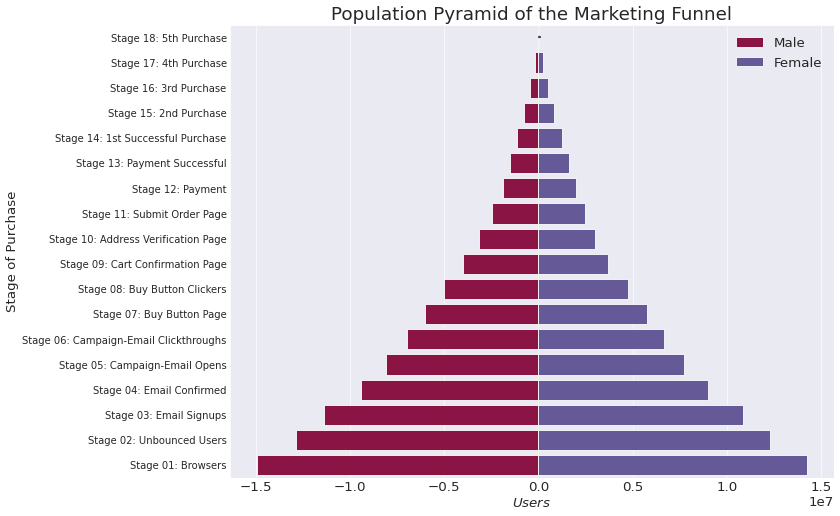

In [106]:
# Read data
# df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")
df = pd.read_csv("../data/email_campaign_funnel.csv")

# Draw Plot
plt.figure(figsize=(13, 10), dpi=60)
group_col = 'Gender'
order_of_bars = df.Stage.unique()[::-1]
colors = [plt.cm.Spectral(i / float(len(df[group_col].unique()) - 1)) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col] == group, :], order=order_of_bars, color=c, label=group)

# Decorations
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

# 图30 分类图

分类图可用于可视化彼此相关的2个或更多分类变量的计数分布，seaborn直接支持分类图

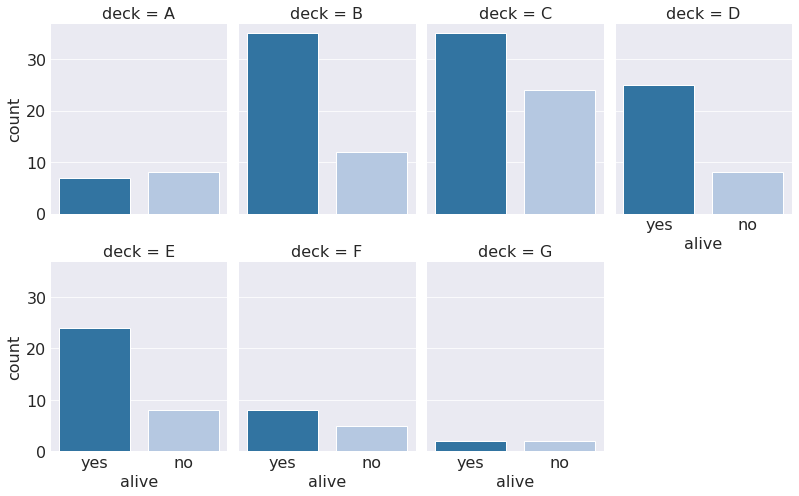

In [107]:
# Load Dataset
titanic = sns.load_dataset("titanic")

# Plot
g = sns.catplot("alive", col="deck", col_wrap=4, data=titanic[titanic.deck.notnull()], kind="count", height=3.5,
                aspect=0.8, palette='tab20')

fig.suptitle('sf')
plt.show()

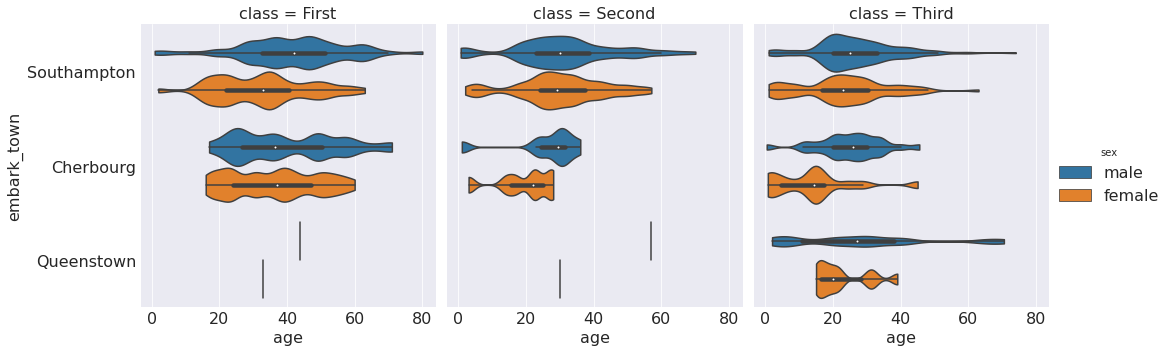

In [108]:
# Load Dataset
titanic = sns.load_dataset("titanic")

# Plot
sns.catplot(x="age", y="embark_town", hue="sex", col="class", data=titanic[titanic.embark_town.notnull()], orient="h",
            height=5, aspect=1, palette="tab10", kind="violin", dodge=True, cut=0, bw=0.2)

# 图31 华夫饼图

华夫饼图可以显示更大人群中的群体组成

绘制华夫饼图可以导入`pywaffle`包，需要执行`pip install pywaffle`

原代码运行报错`ValueError: Single argument to subplot must be a three-digit integer, not '111'`，将`'111'`改为`111`即可

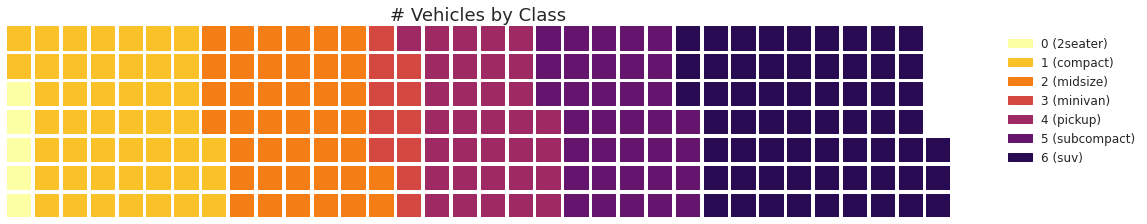

In [113]:
# Reference: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart
from pywaffle import Waffle

# Import
# df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw = pd.read_csv("../data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i / float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['class', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize': 18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)

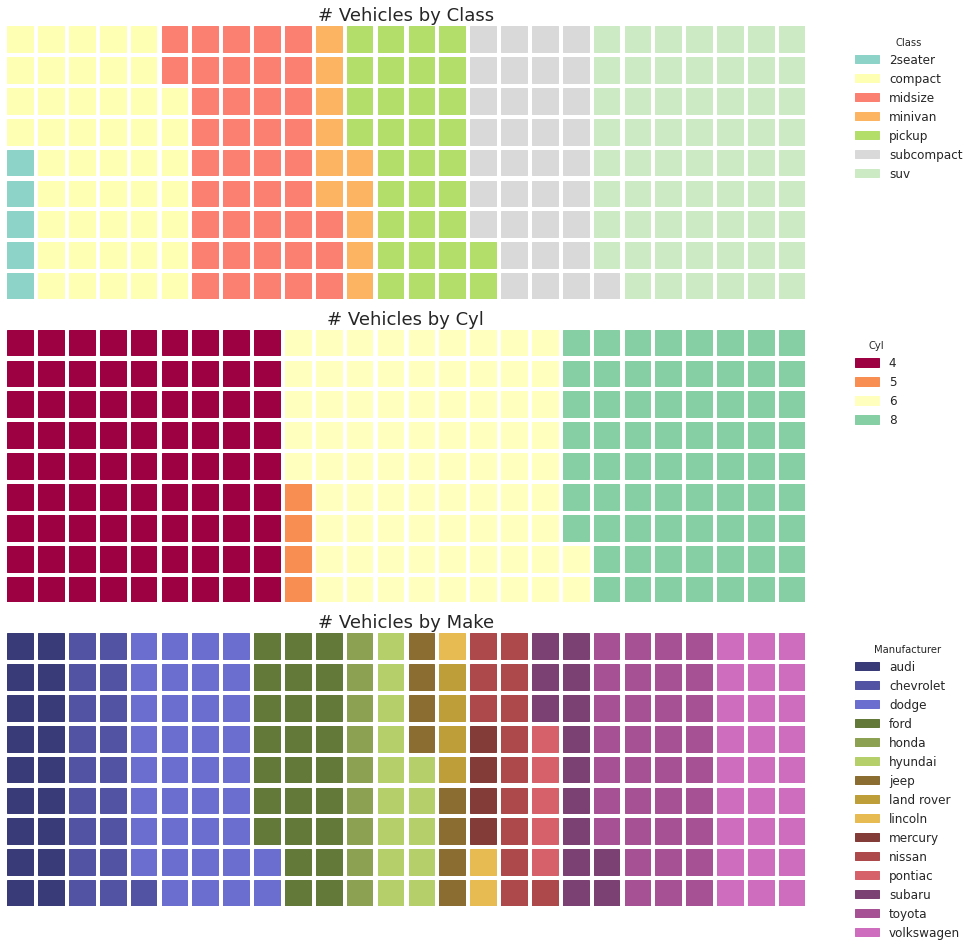

In [114]:
from pywaffle import Waffle

# Import
# df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw = pd.read_csv("../data/mpg_ggplot2.csv")

# Prepare Data
# By Class Data
df_class = df_raw.groupby('class').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
colors_class = [plt.cm.Set3(i / float(n_categories)) for i in range(n_categories)]

# By Cylinders Data
df_cyl = df_raw.groupby('cyl').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
colors_cyl = [plt.cm.Spectral(i / float(n_categories)) for i in range(n_categories)]

# By Make Data
df_make = df_raw.groupby('manufacturer').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
colors_make = [plt.cm.tab20b(i / float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: {
            'values': df_class['counts_class'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_class[['class', 'counts_class']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title': 'Class'},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize': 18},
            'colors': colors_class
        },
        312: {
            'values': df_cyl['counts_cyl'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_cyl[['cyl', 'counts_cyl']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title': 'Cyl'},
            'title': {'label': '# Vehicles by Cyl', 'loc': 'center', 'fontsize': 18},
            'colors': colors_cyl
        },
        313: {
            'values': df_make['counts_make'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_make[['manufacturer', 'counts_make']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title': 'Manufacturer'},
            'title': {'label': '# Vehicles by Make', 'loc': 'center', 'fontsize': 18},
            'colors': colors_make
        }
    },
    rows=9,
    figsize=(16, 14)
)

# 图32 饼图

饼图是显示组构成的经典方式

不建议使用饼图，因为饼部分的扇形面积有时会产生误导，强烈建议明确写下饼图每个部分的百分比或数字

原代码运行报错`TypeError: pie() got an unexpected keyword argument 'dpi'`，将`df.plot(kind='pie', subplots=True, figsize=(8, 8), dpi= 60)`改成`df.plot(kind='pie', subplots=True, figsize=(8, 8))`即可

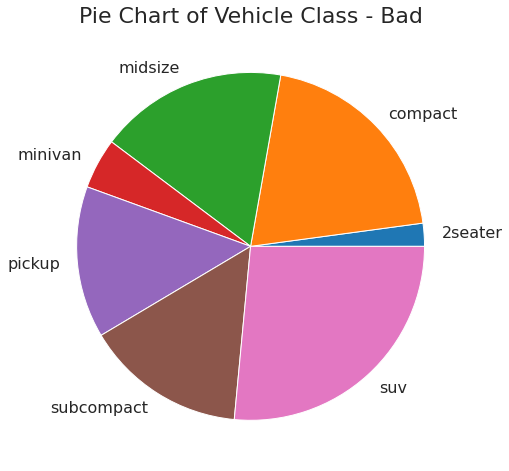

In [118]:
# Import
# df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw = pd.read_csv("../data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()

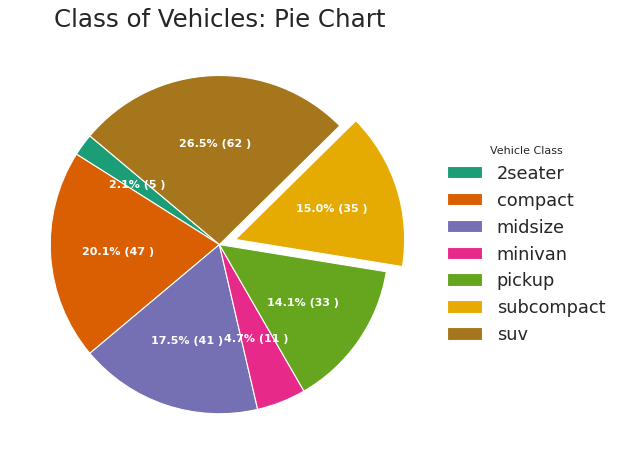

In [120]:
# Import
# df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw = pd.read_csv("../data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi=80)

data = df['counts']
categories = df['class']
explode = [0, 0, 0, 0, 0, 0.1, 0]


def func(num, sum_num):
    absolute = int(num / 100. * np.sum(sum_num))
    return "{:.1f}% ({:d} )".format(num, absolute)


wedges, texts, auto_texts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"),
                                   colors=plt.cm.Dark2.colors, startangle=140, explode=explode)

# Decoration
ax.legend(wedges, categories, title="Vehicle Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(auto_texts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()

# 图33 树状图

树形图类似于饼图，在不误导每个分组占比的情况下做得更好

绘制树状图可以导入`squarify`包，需要执行`pip install squarify`

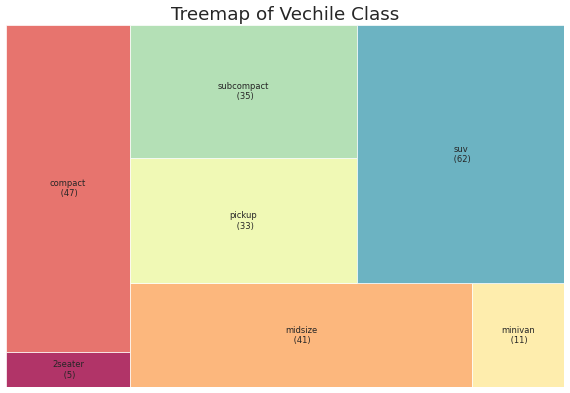

In [121]:
import squarify

# Import Data
# df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw = pd.read_csv("../data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i / float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12, 8), dpi=60)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)

# Decorate
plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

# 图34 条形图

条形图是基于计数或任何给定指标可视化项目的经典方式

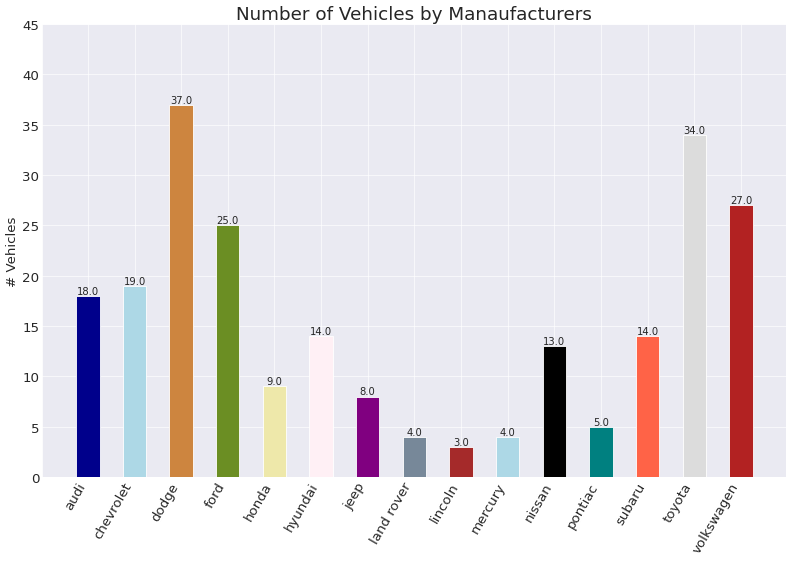

In [122]:
import random

# Import Data
# df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw = pd.read_csv("../data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
n = df['manufacturer'].unique().__len__() + 1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16, 10), dpi=60)
plt.bar(df['manufacturer'], df['counts'], color=c, width=0.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom',
             fontdict={'fontweight': 500, 'size': 12})

# Decoration
plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment='right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 45)
plt.show()

# 图35 时间序列图

时间序列图用于可视化给定指标如何随时间变化

原代码运行报错`ValueError: Unrecognized character t in format string`，将`plt.plot('date', 'traffic', data=df, color='tab:red')`改为`plt.plot('date', 'value', data=df, color='tab:red')`

原代码运行横坐标刻度不正确，将`xtick_labels = [x[-4:] for x in df.date.tolist()[::12]]`改为`xtick_labels = [x[:4] for x in df.date.tolist()[::12]]`

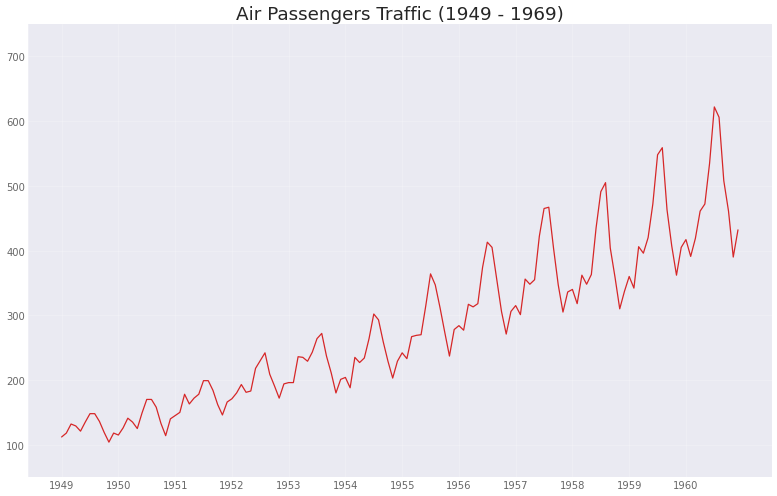

In [132]:
# Import Data
# df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
df = pd.read_csv('../data/air_passengers.csv')

# Draw Plot
plt.figure(figsize=(16, 10), dpi=60)
plt.plot('date', 'value', data=df, color='tab:red')

# Decoration
plt.ylim(50, 750)
xtick_location = df.index.tolist()[::12]
xtick_labels = [x[:4] for x in df.date.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='both', alpha=0.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

# 图36 带波峰波谷标记的时序图

下面的时间序列绘制了所有的高峰和低谷，并注释了所选特殊事件的发生

原代码运行报错`KeyError: 'traffic'`，将`data = df['traffic'].values`改为`data = df['value'].values`

此外，以下代码也要修正(traffic改为value)：
- `plt.plot('date', 'traffic', data=df, color='tab:blue', label='Air Traffic')`
- `plt.scatter(df.date[peak_locations], df.traffic[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')`
- `plt.scatter(df.date[trough_locations], df.traffic[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')`
- `plt.text(df.date[p], df.traffic[p] + 15, df.date[p], horizontalalignment='center', color='darkgreen')`
- `plt.text(df.date[t], df.traffic[t] - 35, df.date[t], horizontalalignment='center', color='darkred')`

说明：日期格式和原代码用的不同

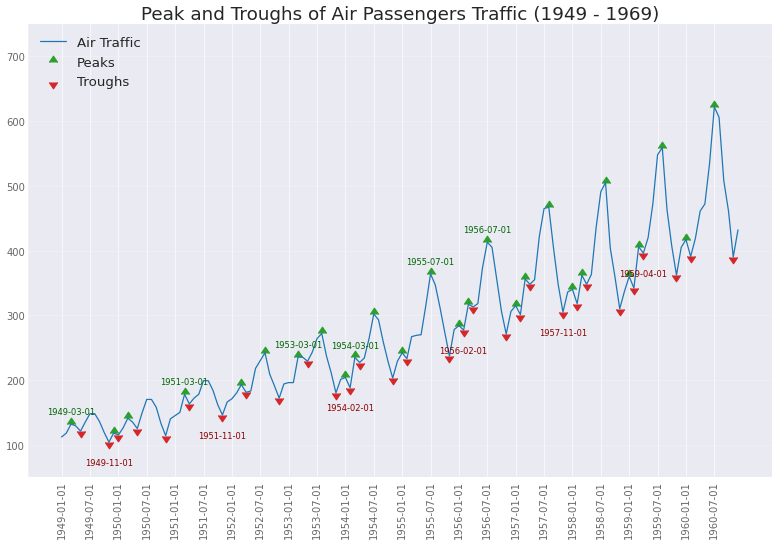

In [140]:
# Import Data
# df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
df = pd.read_csv('../data/air_passengers.csv')

# Get the Peaks and Troughs
data = df['value'].values
double_diff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(double_diff == -2)[0] + 1

double_diff2 = np.diff(np.sign(np.diff(-1 * data)))
trough_locations = np.where(double_diff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(16, 10), dpi=60)
plt.plot('date', 'value', data=df, color='tab:blue', label='Air Traffic')
plt.scatter(df.date[peak_locations], df.value[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green',
            s=100, label='Peaks')
plt.scatter(df.date[trough_locations], df.value[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red',
            s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.date[p], df.value[p] + 15, df.date[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.date[t], df.value[t] - 35, df.date[t], horizontalalignment='center', color='darkred')

# Decoration
plt.ylim(50, 750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=0.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.yticks(fontsize=12, alpha=0.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(0.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 图37 自相关和部分自相关图

这里提到的图是自相关(ACF)和偏自相关(PACF)图

ACF图显示了时间序列与其自身滞后的相关性，PACF图上每条垂直线表示序列与其从滞后0开始的滞后之间的相关性

图中的蓝色阴影区域是显着性水平，蓝线以上的滞后是显着滞后

PACF图显示了任何给定滞后(时间序列)与当前序列的自相关，但消除了滞后之间的贡献

原代码关于traffic改为value的问题此处不赘述

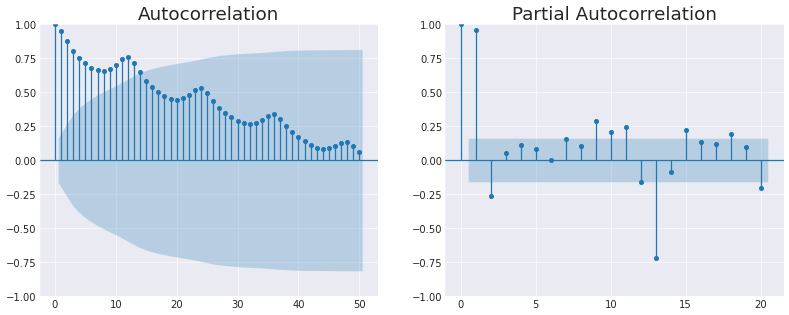

In [141]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import Data
# df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
df = pd.read_csv('../data/air_passengers.csv')

# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=60)
plot_acf(df.value.tolist(), ax=ax1, lags=50)
plot_pacf(df.value.tolist(), ax=ax2, lags=20)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3)
ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3)
ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3)
ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3)
ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

# 图38 互相关图

互相关图显示了两个时间序列彼此的滞后

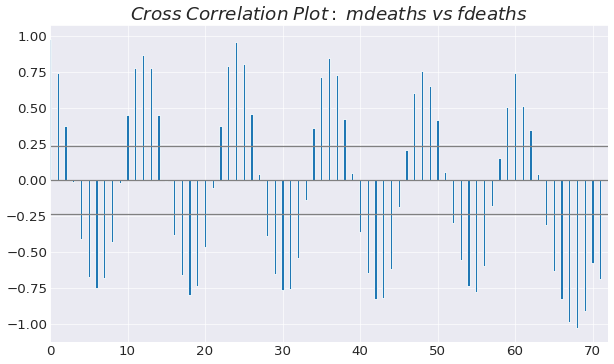

In [142]:
import statsmodels.tsa.stattools as stattools

# Import Data
# df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')
df = pd.read_csv('../data/mortality.csv')
x = df['mdeaths']
y = df['fdeaths']

# Compute Cross Correlations
ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)

# Compute the Significance level
# ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
conf_level = 2 / np.sqrt(nlags)

# Draw Plot
plt.figure(figsize=(12, 7), dpi=60)

plt.hlines(0, xmin=0, xmax=100, color='gray')  # 0 axis
plt.hlines(conf_level, xmin=0, xmax=100, color='gray')
plt.hlines(-conf_level, xmin=0, xmax=100, color='gray')

plt.bar(x=np.arange(len(ccs)), height=ccs, width=.3)

# Decoration
plt.title('$Cross\; Correlation\; Plot:\; mdeaths\; vs\; fdeaths$', fontsize=22)
plt.xlim(0, len(ccs))
plt.show()

# 图39 时间序列分解图

时间序列分解图显示时间序列分解为趋势、季节性和残差分量

原代码关于traffic改为value的问题此处不赘述

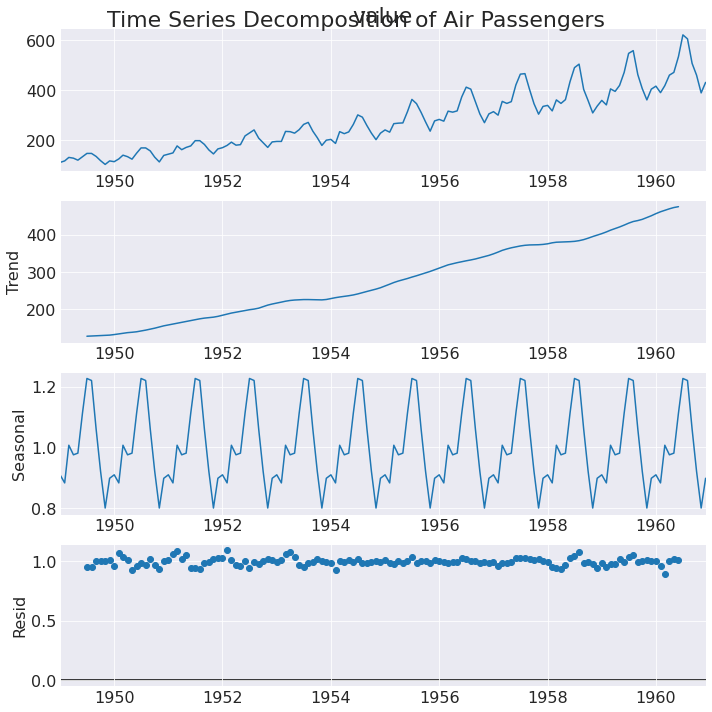

In [144]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
# df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
df = pd.read_csv('../data/air_passengers.csv')
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
df.set_index(dates, inplace=True)

# Decompose
result = seasonal_decompose(df['value'], model='multiplicative')

# Plot
plt.rcParams.update({'figure.figsize': (10, 10)})
result.plot().suptitle('Time Series Decomposition of Air Passengers')
plt.show()

# 图40 多重时间序列

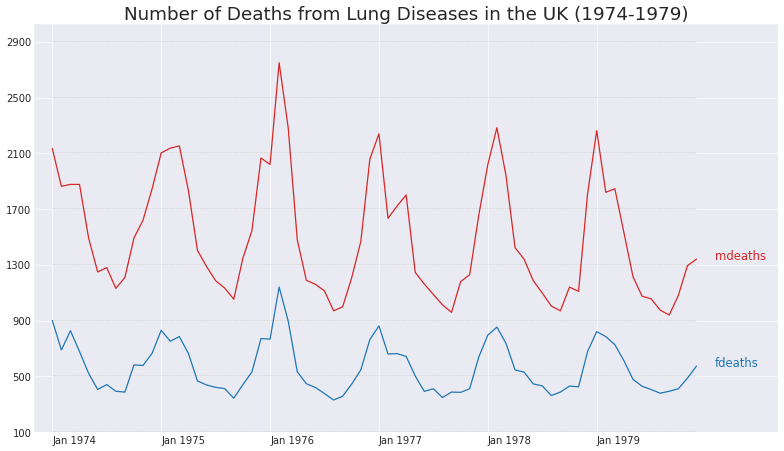

In [145]:
# Import Data
# df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')
df = pd.read_csv('../data/mortality.csv')

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 100
y_UL = int(df.iloc[:, 1:].max().max() * 1.1)
y_interval = 400
my_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

# Draw Plot and Annotate
fig, ax = plt.subplots(1, 1, figsize=(16, 9), dpi=60)

columns = df.columns[1:]
for i, column in enumerate(columns):
    plt.plot(df.date.values, df[column].values, lw=1.5, color=my_colors[i])
    plt.text(df.shape[0] + 1, df[column].values[-1], column, fontsize=14, color=my_colors[i])

# Draw Tick lines
for y in range(y_LL, y_UL, y_interval):
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations
plt.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False,
                labelleft=True)

# Lighten borders
plt.gca().spines["top"].set_alpha(0.3)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.3)
plt.gca().spines["left"].set_alpha(0.3)

plt.title('Number of Deaths from Lung Diseases in the UK (1974-1979)', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)
plt.xticks(range(0, df.shape[0], 12), df.date.values[::12], horizontalalignment='left', fontsize=12)
plt.ylim(y_LL, y_UL)
plt.xlim(-2, 80)
plt.show()